In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def scale(img, old_range, new_range):
    shift = -old_range[0] + new_range[0] * (old_range[1] - old_range[0]) / (new_range[1] - new_range[0])
    scale = (new_range[1] - new_range[0]) / (old_range[1] - old_range[0])
    return (img + shift) * scale

def normalize(img, out_range=(-1, 1)):
    min_value = np.min(img)
    max_value = np.max(img)
    old_range = (min_value, max_value)
    return scale(img, old_range, out_range)

def robust_min_max(img, consideration_factors=(0.1, 0.1)):
    # sort flattened image
    img_sort = np.sort(img, axis=None)
    # consider x% values
    min_median_index = int(img.size * consideration_factors[0] * 0.5)
    max_median_index = int(img.size * (1 - consideration_factors[1] * 0.5)) - 1
    # return median of highest x% intensity values
    return img_sort[min_median_index], img_sort[max_median_index]

def normalize_robust(img, out_range=(-1, 1), consideration_factors=(0.0001,0.0001)):
    min_value, max_value = robust_min_max(img, consideration_factors)
    if max_value == min_value:
        # fix to prevent div by zero
        max_value = min_value + 1
    old_range = (min_value, max_value)
    return scale(img, old_range, out_range)

In [24]:
img = cv2.imread('template.jpg', cv2.IMREAD_GRAYSCALE).astype(np.float32)
print(img.dtype, img.shape)
shape = img.shape
img = normalize(img.flatten())
img = img.reshape(shape)
print(img.min(), img.max(), img.shape)

float32 (603, 656)
-0.99999994 0.99999994 (603, 656)


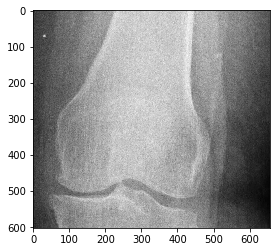

In [13]:
plt.imshow(img, cmap="gray")
plt.show()